In [1]:
from nbodykit.lab import *
import numpy as np
import dask.array as da
import matplotlib.pyplot as plt

import sys
sys.path.append('../general_routines/')
from general_tools import *
from iterative_reconstruction import *

In [2]:
cosmo = cosmology.Planck15

### Import matter catalog
matter = BigFileCatalog('Matter_catalog.bigfile')

# Define global variables
Length = matter.attrs['BoxSize'][0]
Nc = matter.attrs['Nmesh'][0]
zobs = 0.3
zinit = 3.
r_s = 2.*(Length/Nc) # smoothing radius
print('Smoothing radius=', r_s)

### Import galaxy catalog
galaxy = BigFileCatalog('Galaxy_catalog.bigfile')

bg, bg_std = evaluate_bias(galaxy, matter, return_std=True)
bgRSD, bgRSD_std = evaluate_bias(galaxy, matter, tracer_pos='PositionRSD', return_std=True)

print('bias (real) PRE= {:.3f} +- {:.3f}'.format(bg, bg_std))
print('bias (redshift) PRE= {:.3f} +- {:.3f}'.format(bgRSD, bgRSD_std))

/home/pdcg/anaconda3/envs/nbodykit-env/lib/python3.6/site-packages/bigfile/__init__.py:358: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return pyxbigfile.Dataset.__init__(self, file, dtype=dtype, size=size)


Smoothing radius= 7.8125
bias (real) PRE= 1.423 +- 0.020
bias (redshift) PRE= 1.653 +- 0.023


In [3]:
# Valores de formulas (real)
breczinitt = (bg-1)*(D(zobs)/D(zinit)) + 1
breczobst = (bg-1) + (D(zinit)/D(zobs))
print('From real space bias')
print('Expected bias brec(zinit) = {:.3f}'.format(breczinitt))
print('Expected bias brec(zobs) = {:.3f}'.format(breczobst))

# Valores de formulas (redshift)
print('From redshift space bias')
breczinitt = (bgRSD-1)*(D(zobs)/D(zinit)) + 1
breczobst = (bgRSD-1) + (D(zinit)/D(zobs))

print('Expected bias brec(zinit) = {:.3f}'.format(breczinitt))
print('Expected bias brec(zobs) = {:.3f}'.format(breczobst))

From real space bias
Expected bias brec(zinit) = 2.140
Expected bias brec(zobs) = 0.794
From redshift space bias
Expected bias brec(zinit) = 2.761
Expected bias brec(zobs) = 1.024


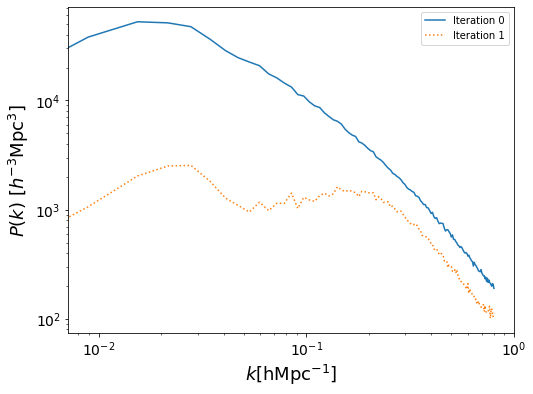

Iteration 1, Mean difference between Pks: 3929.23


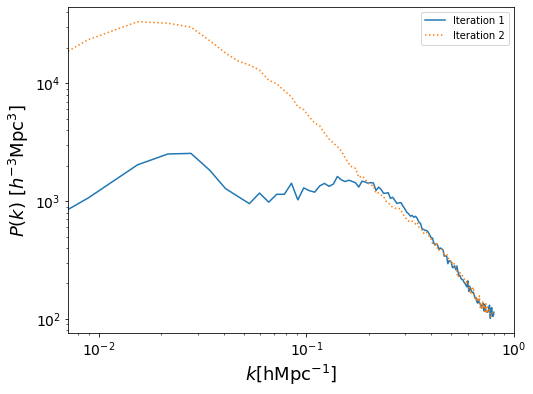

Iteration 2, Mean difference between Pks: 2000.22


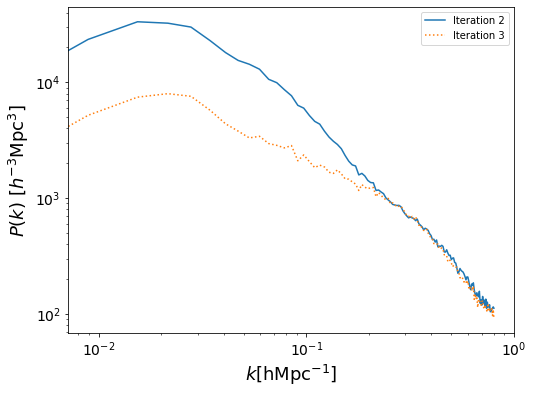

Iteration 3, Mean difference between Pks: 1634.11


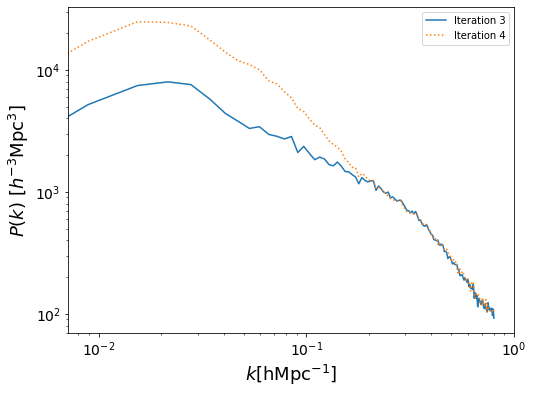

Iteration 4, Mean difference between Pks: 1084.53


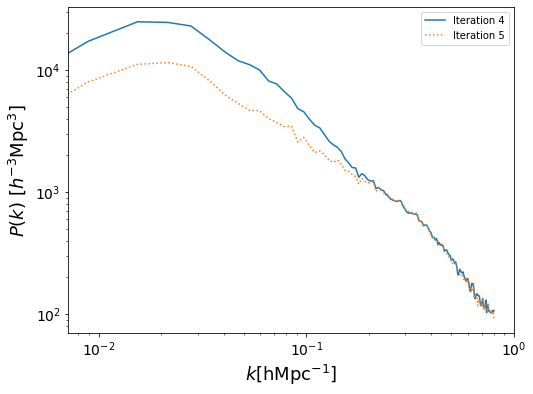

Iteration 5, Mean difference between Pks: 871.27


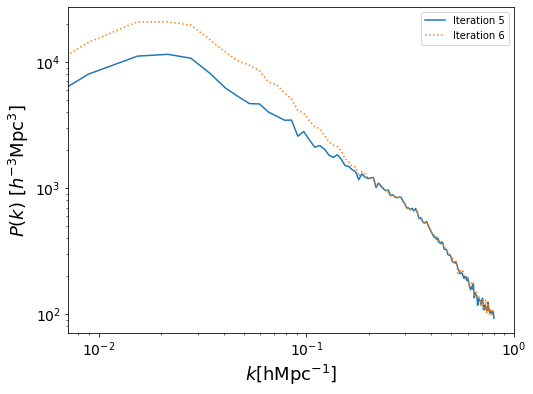

Iteration 6, Mean difference between Pks: 618.05


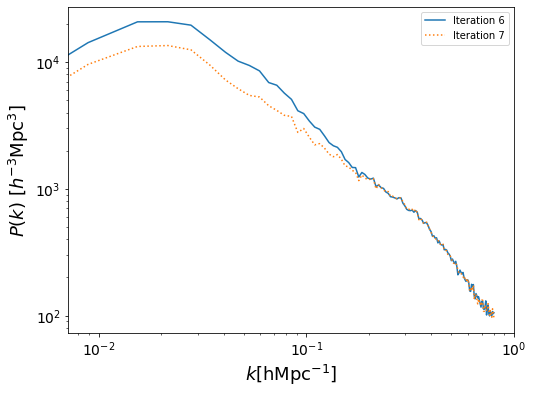

Iteration 7, Mean difference between Pks: 500.55


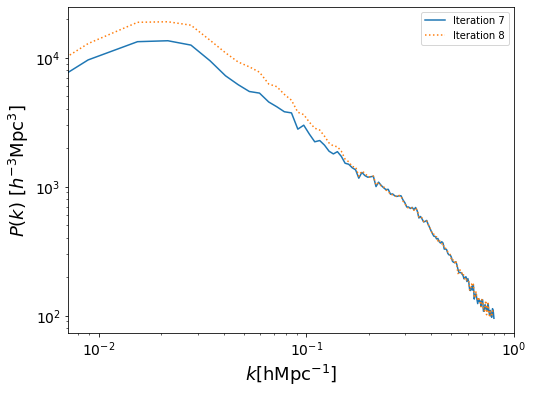

Iteration 8, Mean difference between Pks: 370.26


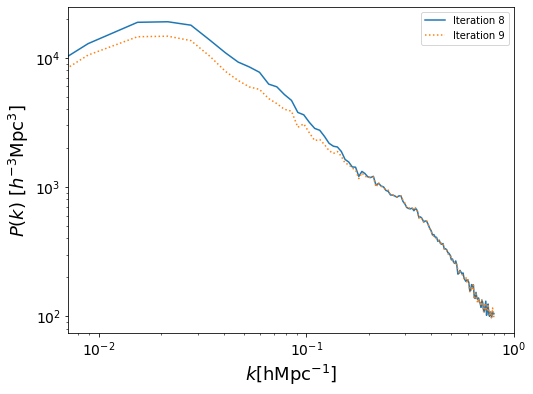

Iteration 9, Mean difference between Pks: 304.18


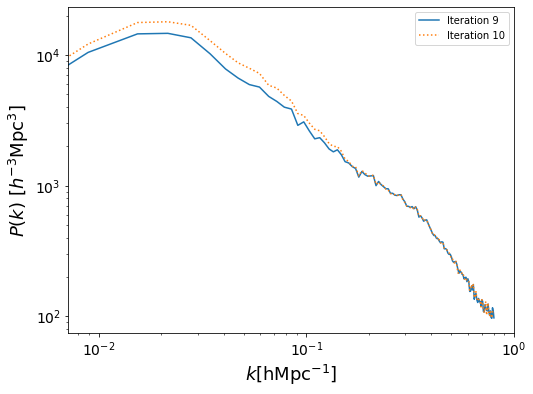

Iteration 10, Mean difference between Pks: 232.29


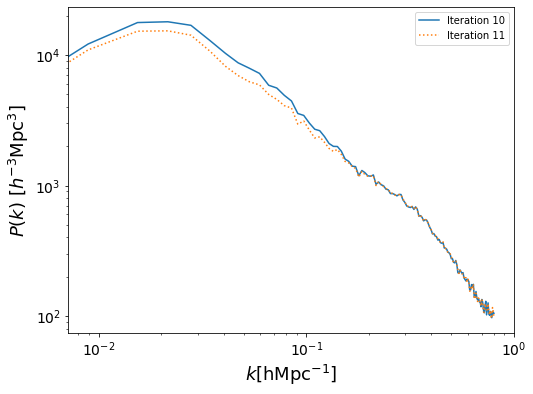

Iteration 11, Mean difference between Pks: 194.14


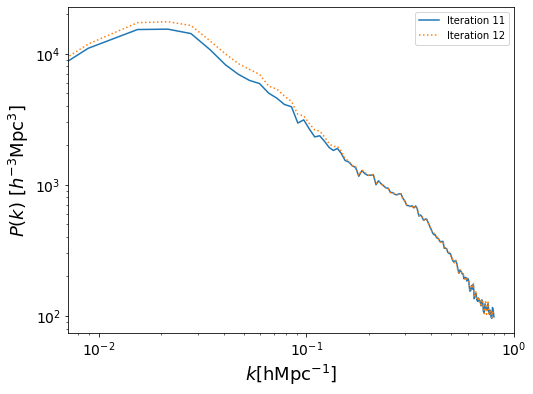

Iteration 12, Mean difference between Pks: 152.50


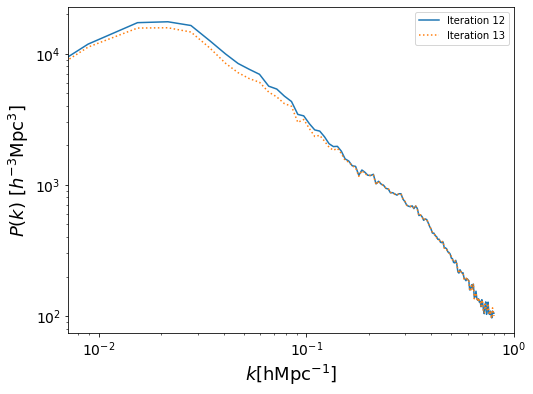

Iteration 13, Mean difference between Pks: 129.67


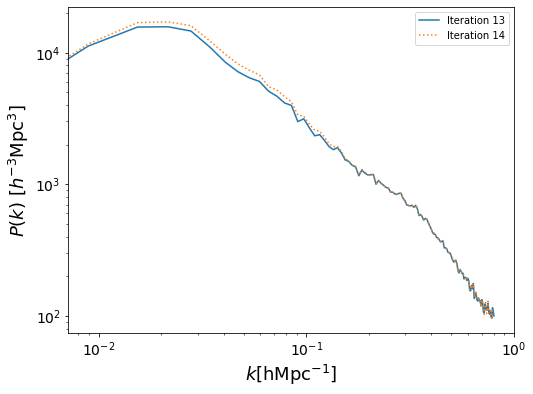

Iteration 14, Mean difference between Pks: 104.45


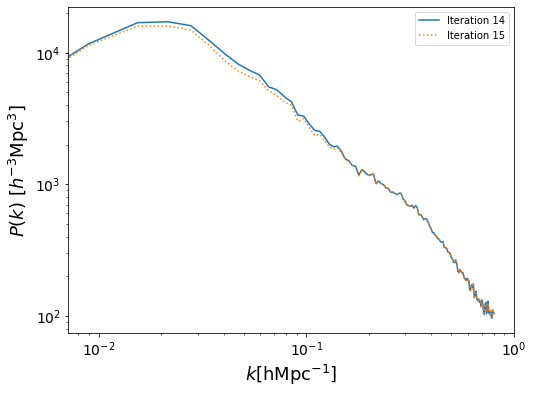

Iteration 15, Mean difference between Pks: 90.39


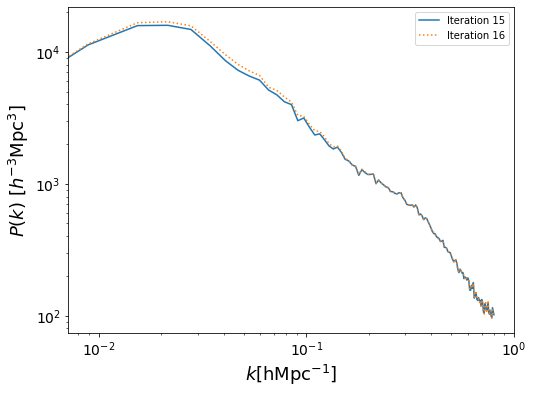

Iteration 16, Mean difference between Pks: 74.61


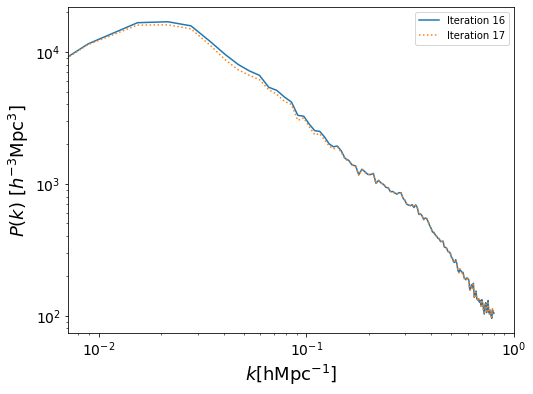

Iteration 17, Mean difference between Pks: 65.80


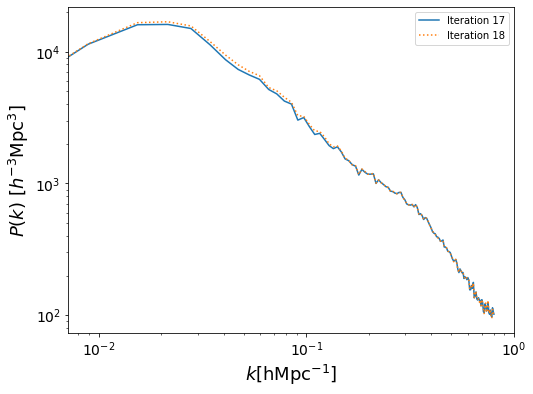

Iteration 18, Mean difference between Pks: 55.53


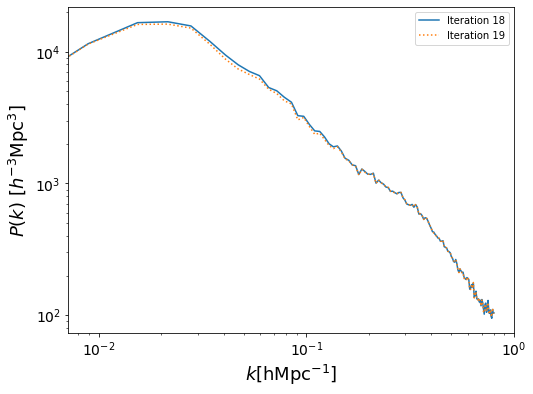

Iteration 19, Mean difference between Pks: 49.87


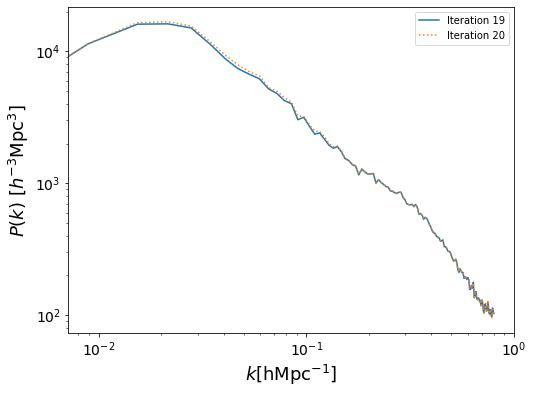

Iteration 20, Mean difference between Pks: 42.94


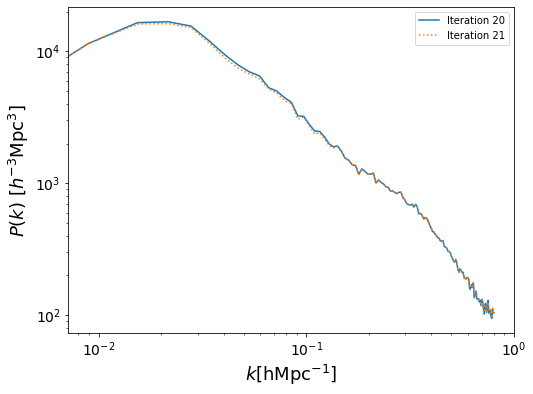

Iteration 21, Mean difference between Pks: 39.20


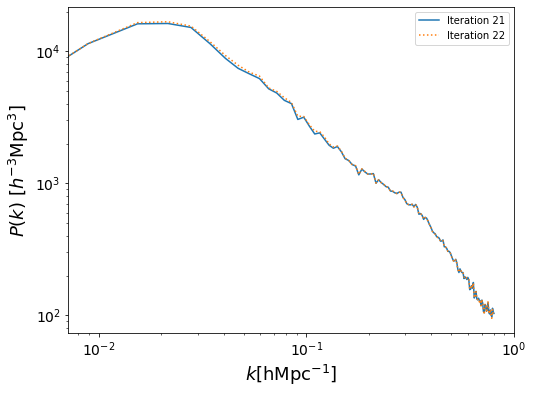

Iteration 22, Mean difference between Pks: 34.43


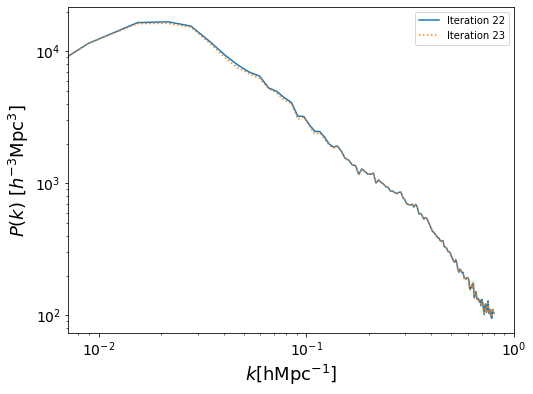

Iteration 23, Mean difference between Pks: 31.92


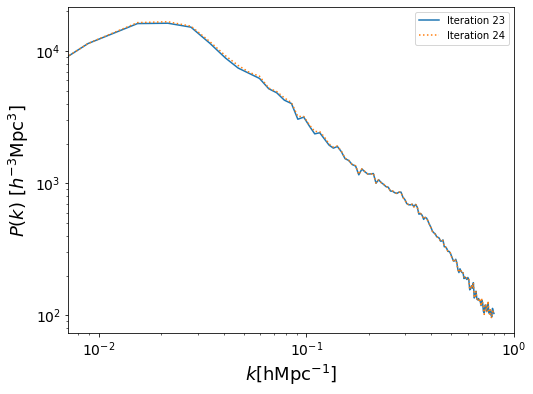

Iteration 24, Mean difference between Pks: 28.51


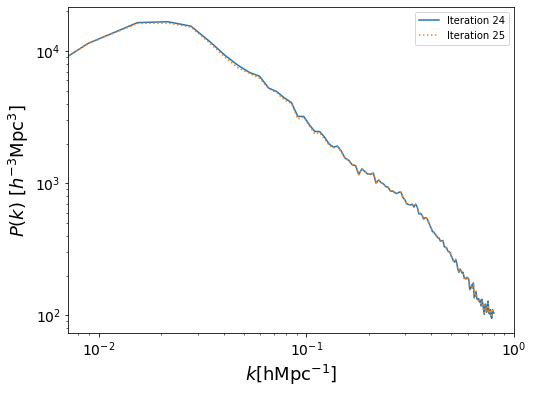

Iteration 25, Mean difference between Pks: 26.76


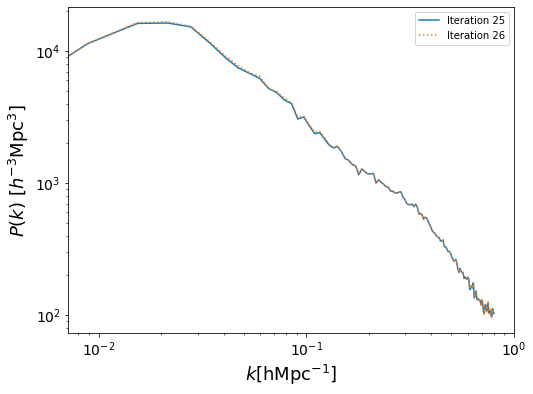

Iteration 26, Mean difference between Pks: 24.23


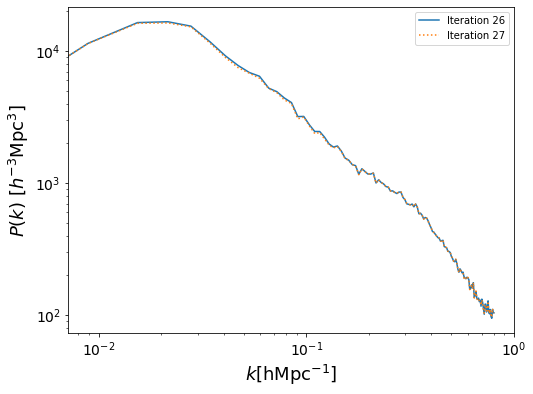

Iteration 27, Mean difference between Pks: 22.96


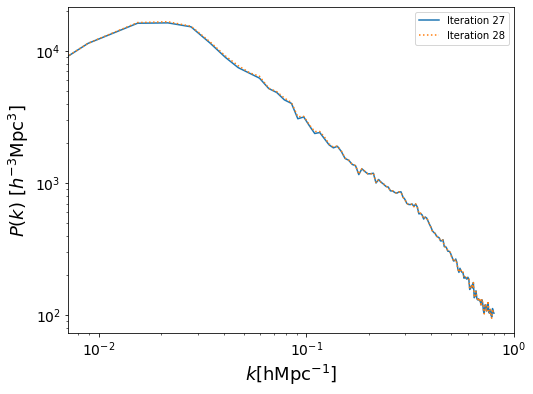

Iteration 28, Mean difference between Pks: 21.04


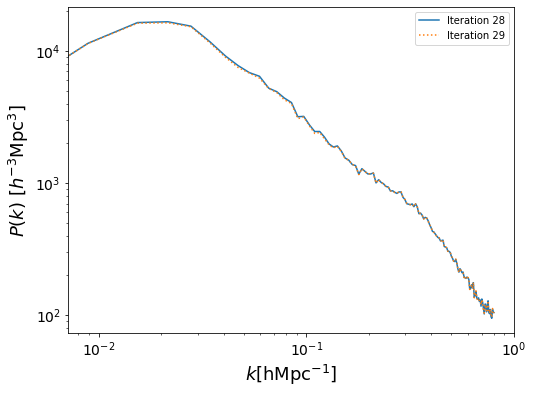

Iteration 29, Mean difference between Pks: 20.14


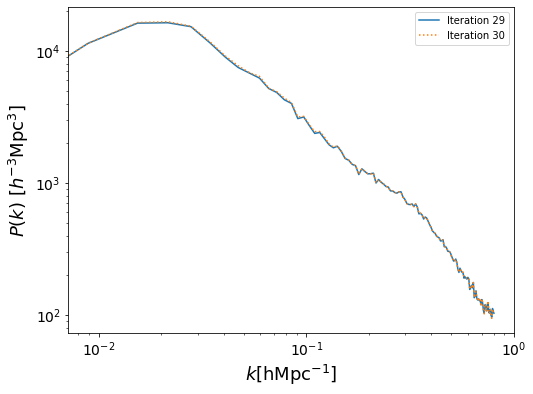

Iteration 30, Mean difference between Pks: 18.66


In [4]:
# From redshift position
iterative_reconstruction(30, Length, Nc, zobs, zinit, galaxy, matter, np.array([Length/2, Length/2, Length/2]), plot_iterations=True)

In [5]:
# Bias in real space
bgreconr2 = evaluate_bias(galaxy, matter, tracer_pos='PositionQ')
bgreconr1 = bgreconr2 * D(zobs)/D(zinit)

print('bias (real) POST= {:.3f}(z={:.2f}),{:.3f}(z={:.2f})'.format(bgreconr1, zinit,bgreconr2, zobs))

# # Bias in redshift space
# bgrecons2 = evaluate_bias(galaxy, matter, tracer_pos='PositionQS')
# bgrecons1 = bgrecons2 * D(zobs)/D(zinit)

# print('bias (redshift) POST= {:.3f}(z={:.2f}),{:.3f}(z={:.2f})'.format(bgrecons1, zinit,bgrecons2, zobs))

bias (real) POST= 2.479(z=3.00),0.919(z=0.30)


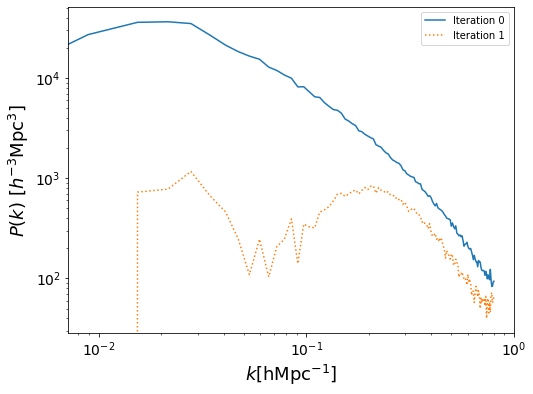

Iteration 1, Mean difference between Pks: 2984.49


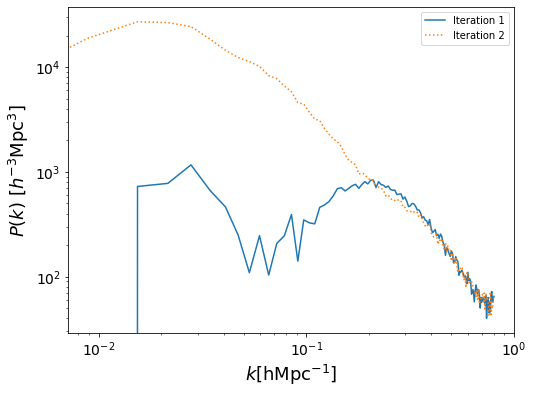

Iteration 2, Mean difference between Pks: 1707.35


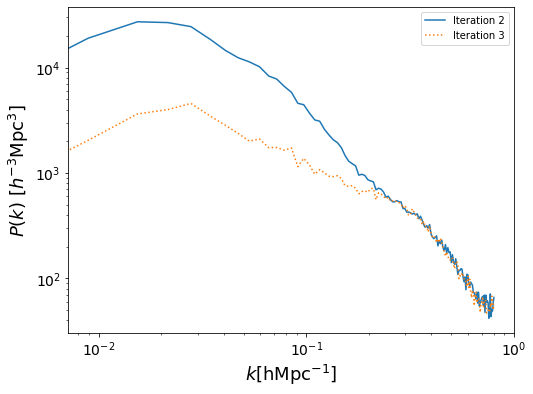

Iteration 3, Mean difference between Pks: 1431.60


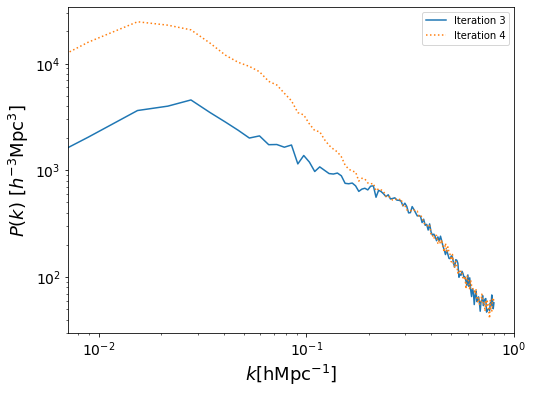

Iteration 4, Mean difference between Pks: 1121.52


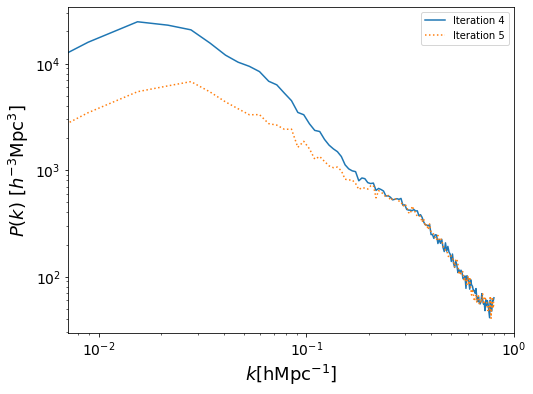

Iteration 5, Mean difference between Pks: 956.75


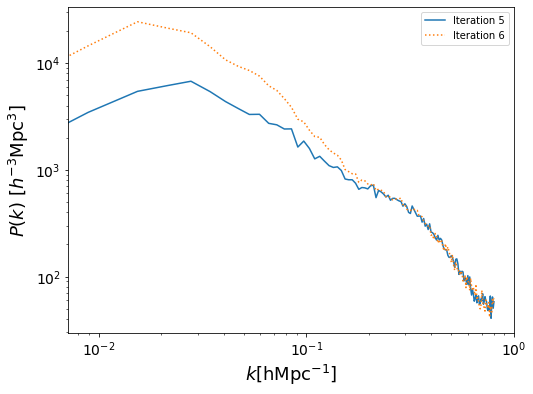

Iteration 6, Mean difference between Pks: 833.91


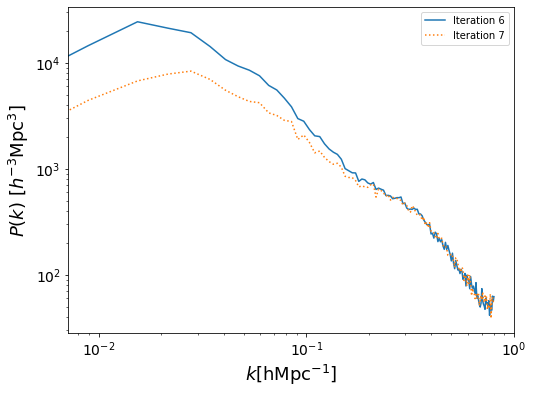

Iteration 7, Mean difference between Pks: 718.92


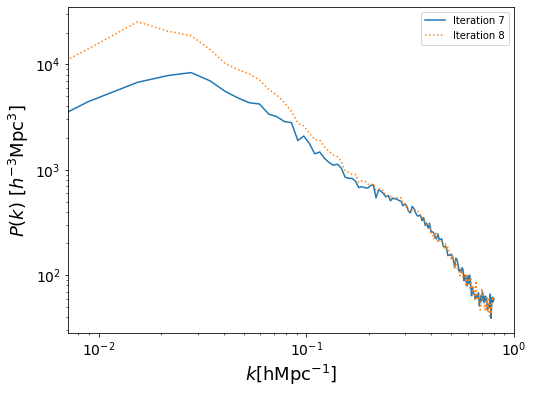

Iteration 8, Mean difference between Pks: 676.61


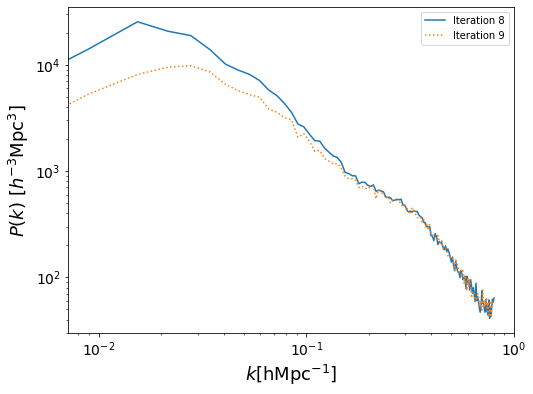

Iteration 9, Mean difference between Pks: 575.93


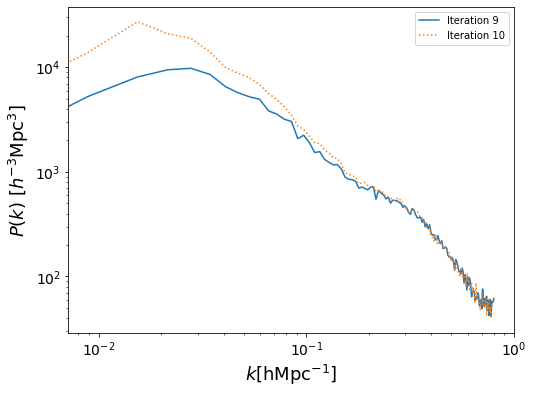

Iteration 10, Mean difference between Pks: 583.61


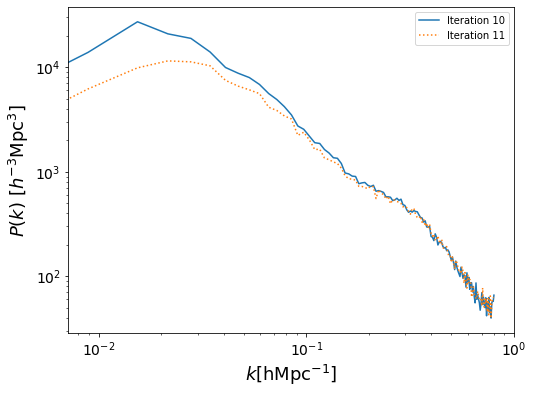

Iteration 11, Mean difference between Pks: 479.59


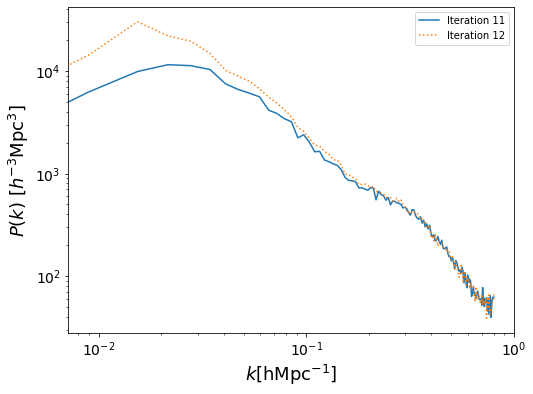

Iteration 12, Mean difference between Pks: 528.14


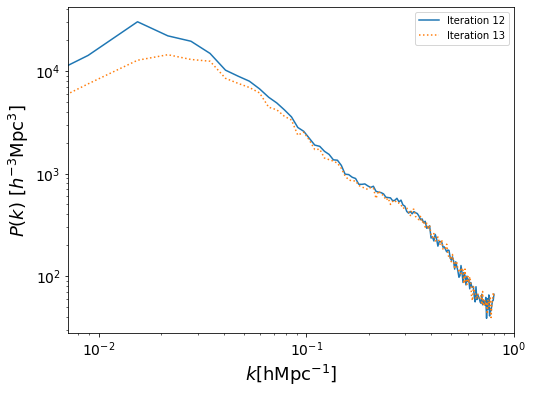

Iteration 13, Mean difference between Pks: 403.32


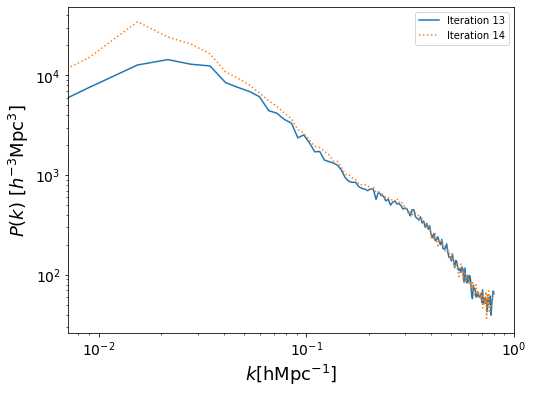

Iteration 14, Mean difference between Pks: 498.13


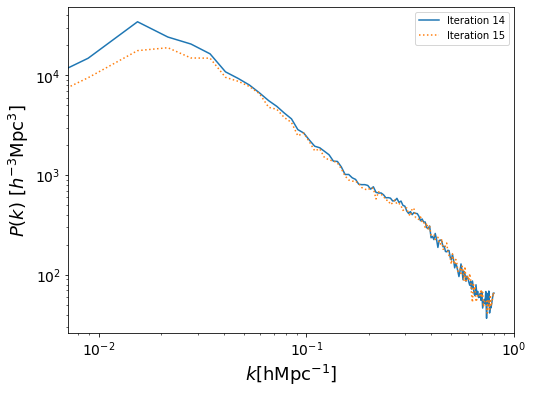

Iteration 15, Mean difference between Pks: 331.42


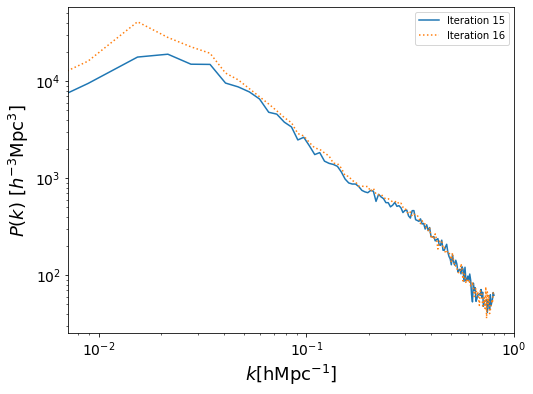

Iteration 16, Mean difference between Pks: 493.75


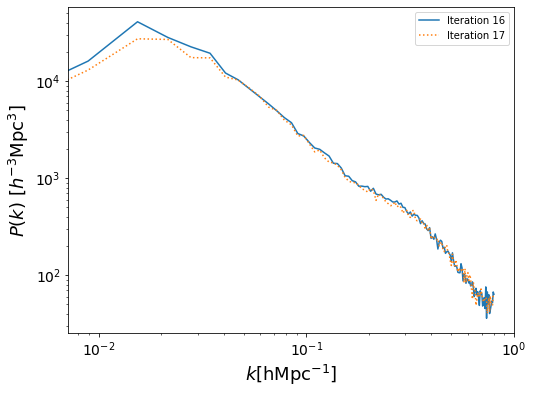

Iteration 17, Mean difference between Pks: 240.83


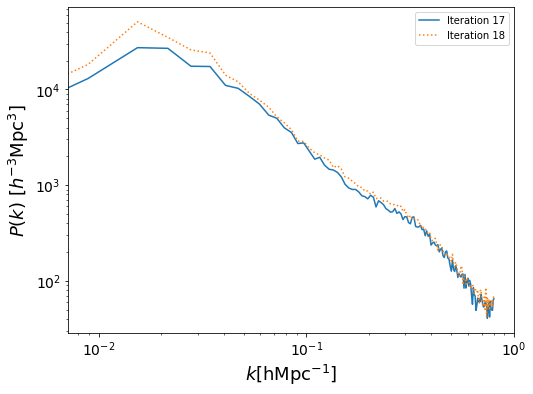

Iteration 18, Mean difference between Pks: 521.30


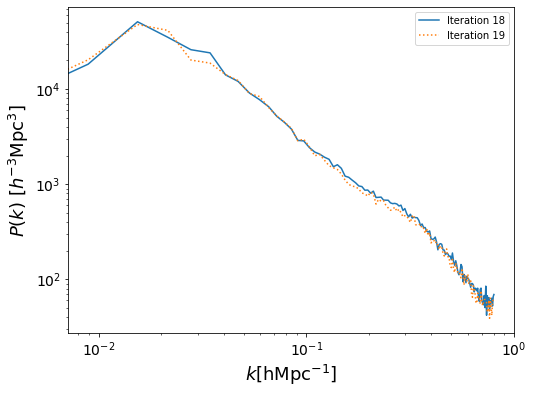

Iteration 19, Mean difference between Pks: 224.60


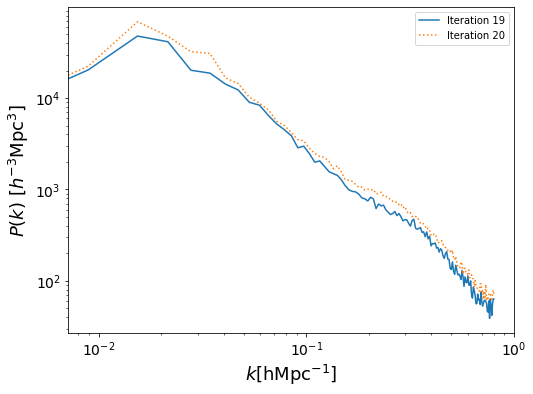

Iteration 20, Mean difference between Pks: 576.84


In [14]:
# From real space position
iterative_reconstruction(20, Length, Nc, zobs, zinit, galaxy, matter, np.array([Length/2, Length/2, Length/2]), real_space=True, plot_iterations=True)

In [15]:
# Bias in real space
bgreconr2 = evaluate_bias(galaxy, matter, tracer_pos='PositionQ')
bgreconr1 = bgreconr2 * D(zobs)/D(zinit)

print('bias (real) POST= {:.2f}(z={:.2f}),{:.2f}(z={:.2f})'.format(bgreconr1, zinit,bgreconr2, zobs))

# Bias in redshift space
bgrecons2 = evaluate_bias(galaxy, matter, tracer_pos='PositionQS')
bgrecons1 = bgrecons2 * D(zobs)/D(zinit)

print('bias (redshift) POST= {:.2f}(z={:.2f}),{:.2f}(z={:.2f})'.format(bgrecons1, zinit,bgrecons2, zobs))

bias (real) POST= 3.05(z=3.00),1.13(z=0.30)
bias (redshift) POST= 2.51(z=3.00),0.93(z=0.30)


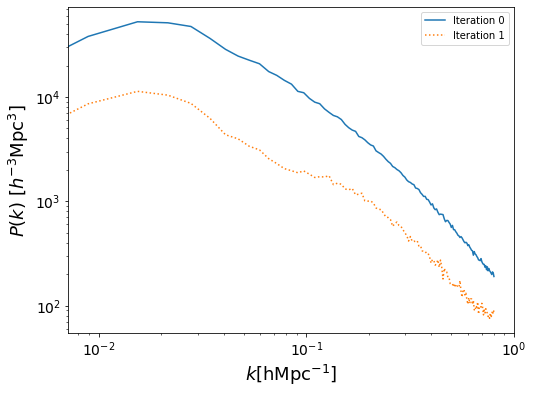

Iteration 1, Mean difference between Pks: 3657.05


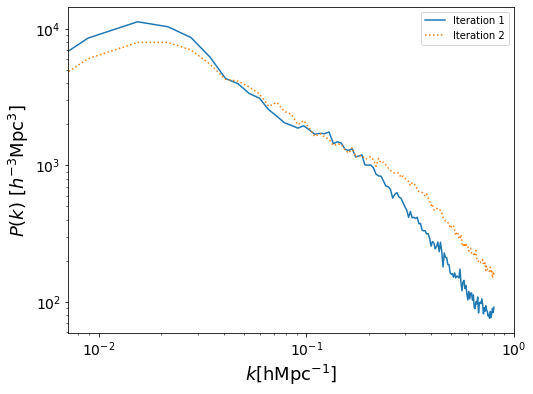

Iteration 2, Mean difference between Pks: 248.68


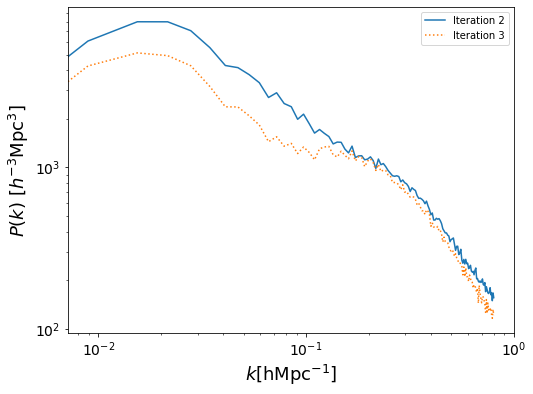

Iteration 3, Mean difference between Pks: 267.37


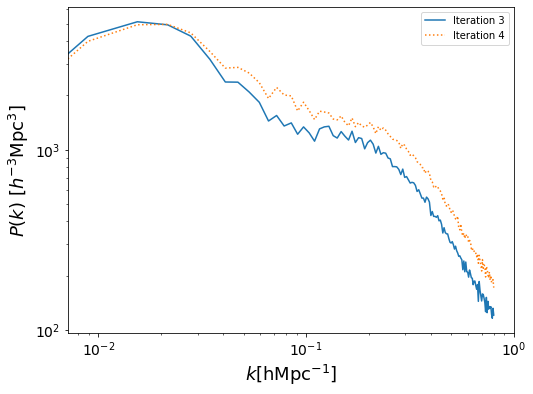

Iteration 4, Mean difference between Pks: 213.41


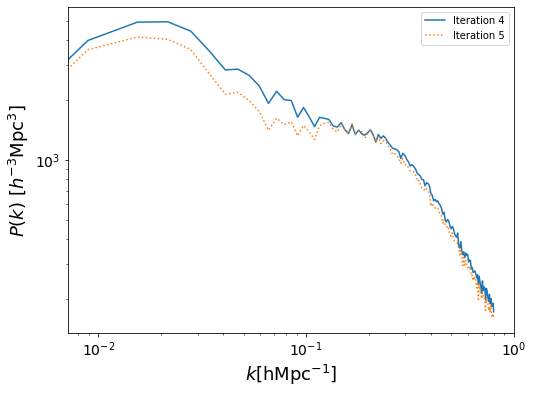

Iteration 5, Mean difference between Pks: 109.70


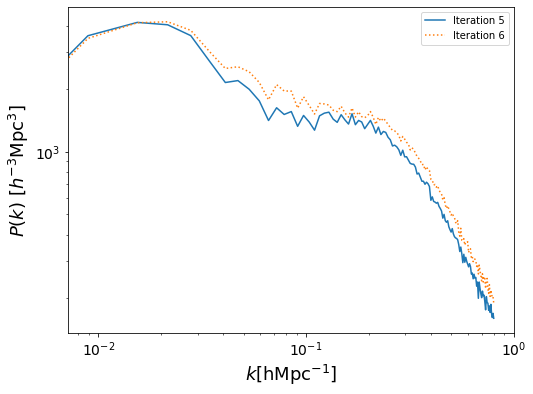

Iteration 6, Mean difference between Pks: 127.94


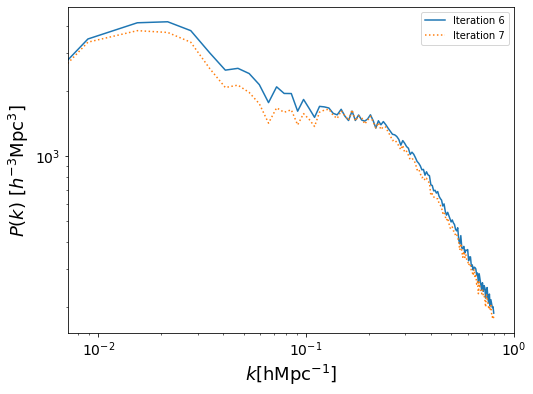

Iteration 7, Mean difference between Pks: 76.62


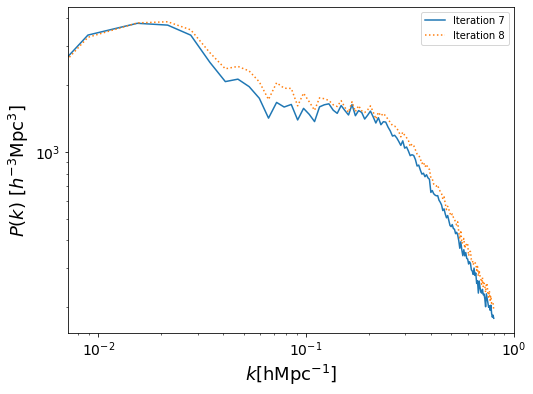

Iteration 8, Mean difference between Pks: 87.96


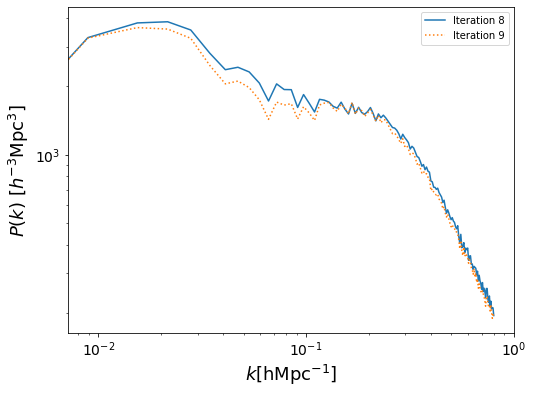

Iteration 9, Mean difference between Pks: 62.47


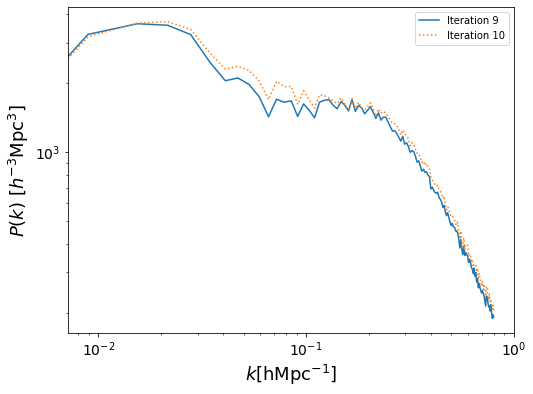

Iteration 10, Mean difference between Pks: 69.09


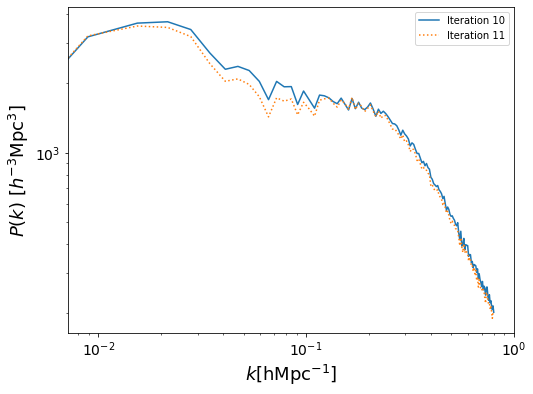

Iteration 11, Mean difference between Pks: 56.00


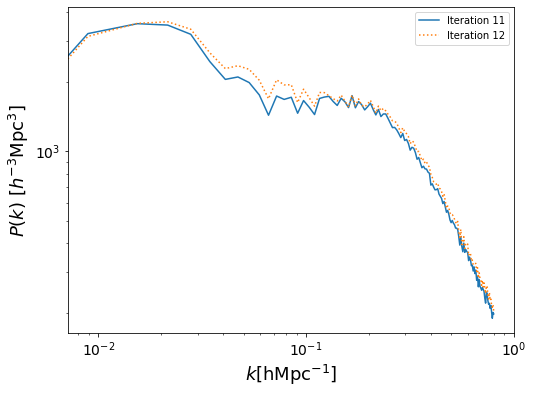

Iteration 12, Mean difference between Pks: 59.63


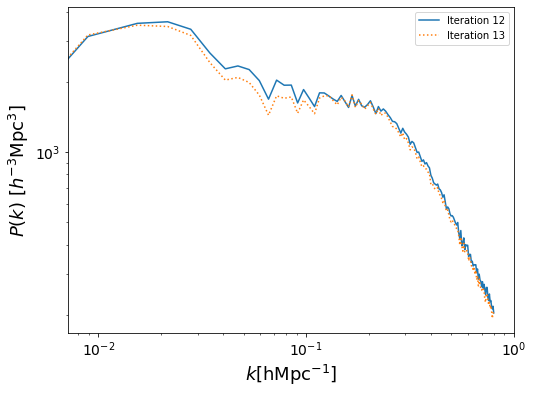

Iteration 13, Mean difference between Pks: 52.08


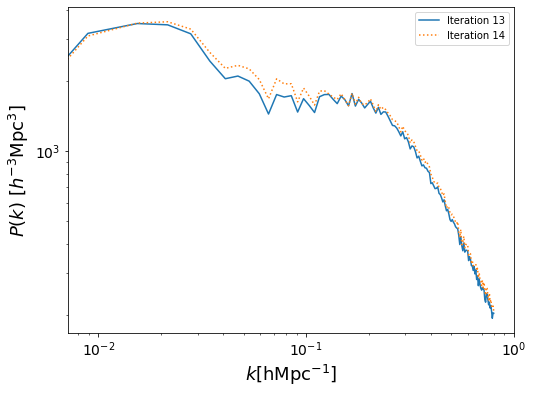

Iteration 14, Mean difference between Pks: 53.62


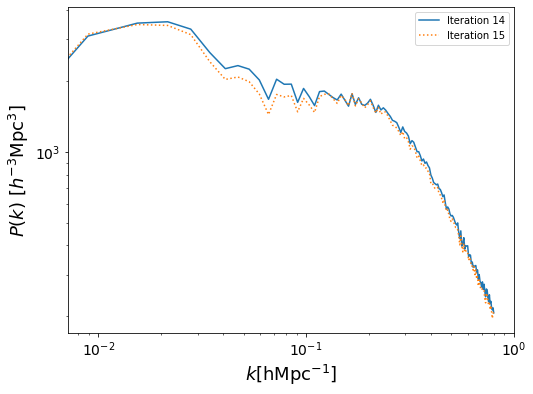

Iteration 15, Mean difference between Pks: 48.99


In [10]:
# From redshift position
iterative_reconstruction(15, Length, Nc, zobs, zinit, galaxy, matter, np.array([Length/2, Length/2, Length/2]), plot_iterations=True, test=True)

In [11]:
# Bias in real space
bgreconr2 = evaluate_bias(galaxy, matter, tracer_pos='PositionQ')
bgreconr1 = bgreconr2 * D(zobs)/D(zinit)

print('bias (real) POST= {:.2f}(z={:.2f}),{:.2f}(z={:.2f})'.format(bgreconr1, zinit,bgreconr2, zobs))

# Bias in redshift space
bgrecons2 = evaluate_bias(galaxy, matter, tracer_pos='PositionQS')
bgrecons1 = bgrecons2 * D(zobs)/D(zinit)

print('bias (redshift) POST= {:.2f}(z={:.2f}),{:.2f}(z={:.2f})'.format(bgrecons1, zinit,bgrecons2, zobs))

bias (real) POST= 1.35(z=3.00),0.50(z=0.30)
bias (redshift) POST= 1.69(z=3.00),0.63(z=0.30)
